In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

import sys
sys.path.append('src/')
from get_network import get_maxout_network
from training_utils import train

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

# Load data

In [3]:
data_dir = '/home/dan/data/cover/'

In [4]:
D = pd.read_csv(data_dir + 'train.csv')
D.drop('Id', axis=1, inplace=True)
all_vars = list(D.columns[:-1])

num_vars = [
    'Elevation', 'Aspect', 'Slope',
    'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
    'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]

D[num_vars] = (D[num_vars] - D[num_vars].mean())/D[num_vars].std()

In [5]:
X = D[all_vars].astype('float32').as_matrix()
Y = D['Cover_Type'].astype('float32').as_matrix()
Y = Y.reshape(-1, 1)

ohe = OneHotEncoder(sparse=False, dtype='float32')
Y = ohe.fit_transform(Y)

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1)

# number of samples in each set
print(len(X_train), len(X_val))

13608 1512


In [6]:
# number of features and number of classes
print(X_train.shape[1], Y_train.shape[1])

54 7


# Train network

In [7]:
graph, ops = get_maxout_network(
    architecture=[54, (50, 3), (50, 3), (50, 3), 7], 
    dropout=[0.2, 0.5, 0.5, 0.1],
    optimizer=tf.train.AdamOptimizer(1e-3), weight_decay=1e-6
)

In [8]:
losses, is_early_stopped = train(
    0, graph, ops, 
    X_train, Y_train, X_val, Y_val,
    batch_size=64, num_epochs=20, steps_per_epoch=400, 
    validation_steps=80, patience=100
)

# (first value: train, second value: val)
# epoch  logloss       accuracy      time 

  1      1.488 1.087   0.381 0.591   3.649
  2      1.122 0.893   0.529 0.662   3.052
  3      1.029 0.825   0.568 0.665   2.960
  4      0.982 0.794   0.588 0.670   2.913
  5      0.960 0.760   0.608 0.688   2.956
  6      0.931 0.747   0.618 0.686   2.835
  7      0.921 0.725   0.625 0.698   2.872
  8      0.903 0.706   0.635 0.708   2.843
  9      0.875 0.717   0.645 0.697   2.897
  10      0.866 0.689   0.648 0.704   2.875
  11      0.869 0.682   0.644 0.715   2.842
  12      0.864 0.692   0.649 0.706   2.850
  13      0.855 0.673   0.648 0.709   2.799
  14      0.849 0.657   0.654 0.734   2.904
  15      0.842 0.666   0.660 0.731   2.977
  16      0.841 0.661   0.655 0.735   2.928
  17      0.831 0.657   0.662 0.728   2.918
  18      0.834 0.654   0.663 0.727   2.850
  19      0.821 0.660   0.667 0.732   2.820
  20      0.814 0.658   0.669 0.727   2.838


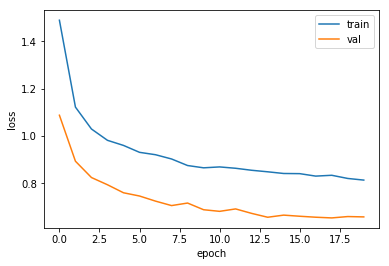

In [9]:
plt.plot([x[1] for x in losses], label='train');
plt.plot([x[2] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('loss');

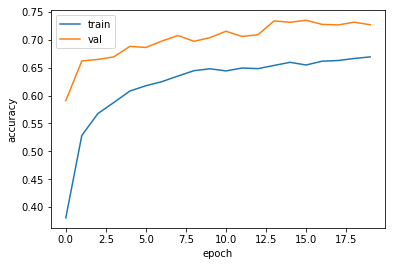

In [10]:
plt.plot([x[3] for x in losses], label='train');
plt.plot([x[4] for x in losses], label='val');
plt.legend();
plt.xlabel('epoch');
plt.ylabel('accuracy');